In [1]:
import os
import json

import numpy as np
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from meld_classifier.meld_cohort import MeldCohort, MeldSubject
from meld_classifier.evaluation import Evaluator
from meld_classifier.experiment import Experiment

import h5py
from matplotlib import gridspec
import matplotlib.pyplot as plt
import seaborn as sns 




In [5]:
site_codes=['H2', 'H3','H4','H5','H6','H7','H9','H10','H11','H12','H14','H15','H16','H17','H18','H19',
                  'H21','H23','H24','H26']
c= MeldCohort(hdf5_file_root='{site_code}_{group}_featurematrix_combat_6.hdf5',            
              dataset='MELD_dataset_V6.csv')

patients = c.get_subject_ids(site_codes=site_codes, group='patient', lesional_only=True)
controls = c.get_subject_ids(site_codes=site_codes, group='control', lesional_only=False)

listids = patients + controls

In [18]:
df=pd.DataFrame()
for subject in listids:
    subj = MeldSubject(subject,cohort=c)
    group = subj.group
    if group == 'patient':
        pair_subject=subject
    else:
        pair_subject = np.random.choice(patients)
        print(subject + ' pair with ' + pair_subject)
        patients.remove(pair_subject)
    features=subj.get_feature_list()
    labels_hemis = {}
    features_hemis={}
    if group=='patient':
        hemi_les=subj.get_lesion_hemisphere()
        lesion = subj.load_feature_values(".on_lh.lesion.mgh", hemi=hemi_les)
    if group=='control':
        pair_subj = MeldSubject(pair_subject,cohort=c)
        hemi_les = pair_subj.get_lesion_hemisphere()
        lesion = pair_subj.load_feature_values(".on_lh.lesion.mgh", hemi=hemi_les)
    values={} 
    for hemi in ['lh','rh']:
        values['ID'] = subject
        values['group'] = group
        if group=='control':
            values['status'] = 'control'
        elif hemi==hemi_les:
            values['status'] = 'ipsi' 
        else:
            values['status'] = 'contra' 
        values['lesion_size'] = lesion.sum()   
        for f,feature in enumerate(features):
            feat = subj.load_feature_values(feature, hemi=hemi)
            values[feature] = np.mean(feat[(lesion==1) & (c.cortex_mask)])
        #add information in data frame
        df2 = pd.DataFrame([values])   
        df = pd.concat([df, df2])

MELD_H2_15T_C_0001 pair with MELD_H5_3T_FCD_0016
MELD_H2_15T_C_0002 pair with MELD_H11_3T_FCD_0035
MELD_H2_15T_C_0003 pair with MELD_H23_15T_FCD_0023
MELD_H2_15T_C_0004 pair with MELD_H17_3T_FCD_0060
MELD_H2_15T_C_0005 pair with MELD_H4_15T_FCD_0017
MELD_H2_3T_C_0001 pair with MELD_H17_3T_FCD_0018
MELD_H2_3T_C_0002 pair with MELD_H15_3T_FCD_0011
MELD_H2_3T_C_0003 pair with MELD_H5_3T_FCD_0004
MELD_H2_3T_C_0004 pair with MELD_H16_3T_FCD_026
MELD_H2_3T_C_0006 pair with MELD_H17_3T_FCD_0073
MELD_H2_3T_C_0007 pair with MELD_H11_3T_FCD_0005
MELD_H2_3T_C_0008 pair with MELD_H11_3T_FCD_0045
MELD_H2_3T_C_0009 pair with MELD_H17_3T_FCD_0122
MELD_H2_3T_C_0010 pair with MELD_H24_3T_FCD_0019
MELD_H2_3T_C_0011 pair with MELD_H26_15T_FCD_0009
MELD_H2_3T_C_0012 pair with MELD_H3_3T_FCD_0021
MELD_H2_3T_C_0013 pair with MELD_H21_3T_FCD_0046
MELD_H2_3T_C_0014 pair with MELD_H2_3T_FCD_0010
MELD_H2_3T_C_0015 pair with MELD_H10_3T_FCD_0015
MELD_H2_3T_C_0017 pair with MELD_H6_3T_FCD_0020
MELD_H2_3T_C_0018 p

In [19]:
df

,ID,group,status,lesion_size,.combat.on_lh.curv.sm5.mgh,.combat.on_lh.pial.K_filtered.sm20.mgh,.combat.on_lh.sulc.sm5.mgh,.combat.on_lh.thickness.sm10.mgh,.combat.on_lh.w-g.pct.sm10.mgh,.inter_z.asym.intra_z.combat.on_lh.curv.sm5.mgh,...,.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.75.sm10.mgh,.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.sm10.mgh,.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_0.5.sm10.mgh,.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_1.sm10.mgh,.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.25.sm10.mgh,.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.5.sm10.mgh,.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.75.sm10.mgh,.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.sm10.mgh,.inter_z.intra_z.combat.on_lh.wm_FLAIR_0.5.sm10.mgh,.inter_z.intra_z.combat.on_lh.wm_FLAIR_1.sm10.mgh
0,MELD_H2_15T_FCD_0001,patient,ipsi,267.000000,-0.070202,0.451854,-0.085573,2.742981,30.365252,-0.765692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,MELD_H2_15T_FCD_0001,patient,contra,267.000000,-0.097783,0.355104,-0.415745,3.055927,29.568310,0.765692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,MELD_H2_15T_FCD_0002,patient,ipsi,2374.500000,0.004399,0.646584,0.302688,2.669496,29.843420,0.125987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,MELD_H2_15T_FCD_0002,patient,contra,2374.500000,-0.018075,0.493135,0.225675,2.602675,29.551418,-0.125987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,MELD_H2_15T_FCD_0003,patient,contra,3882.916748,-0.066436,0.764042,-0.435825,3.003136,18.771576,0.529298,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,MELD_H26_3T_FCD_0004,patient,contra,19107.121094,-0.047669,0.539471,0.011772,3.311334,25.357283,-0.036373,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,MELD_H26_3T_FCD_0007,patient,ipsi,12439.414062,-0.035144,0.716394,-0.052500,3.353360,20.264584,0.054887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,MELD_H26_3T_FCD_0007,patient,contra,12439.414062,-0.049105,0.360770,-0.079892,3.304496,20.579214,-0.054887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,MELD_H26_3T_FCD_0011,patient,contra,334.833344,-0.026070,0.420059,0.197122,2.811200,26.204979,0.280953,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([69., 97., 89., 39., 33., 26., 19., 26., 13., 16.,  6., 10., 12.,
         8.,  7.,  6.,  3.,  5.,  6.,  1.,  4.,  1.,  3.,  3.,  2.,  1.,
         4.,  3.,  2.,  3.,  1.,  1.,  2.,  2.,  1.,  0.,  2.,  1.,  1.,
         1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  3.]),
 array([9.0000000e+00, 4.4181903e+02, 8.7463806e+02, 1.3074570e+03,
        1.7402761e+03, 2.1730952e+03, 2.6059141e+03, 3.0387332e+03,
        3.4715522e+03, 3.9043711e+03, 4.3371904e+03, 4.7700093e+03,
        5.2028281e+03, 5.6356475e+03, 6.0684663e+03, 6.5012852e+03,
        6.9341045e+03, 7.3669233e+03, 7.7997422e+03, 8.2325615e+03,
        8.6653809e+03, 9.0981992e+03, 9.5310186e+03, 9.9638379e+03,
        1.0396656e+04, 1.0

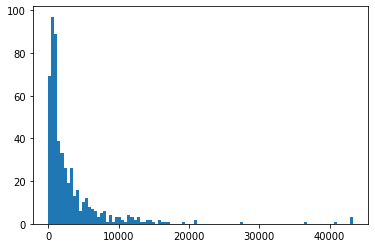

In [28]:



lesion_size=df[df.status == 'ipsi']['lesion_size']
lesion_size = np.clip(lesion_size, np.percentile(lesion_size, 0), np.percentile(lesion_size, 99.5) )
plt.hist(np.array(lesion_size), bins=100)

In [29]:
features

['.combat.on_lh.curv.sm5.mgh',
 '.combat.on_lh.pial.K_filtered.sm20.mgh',
 '.combat.on_lh.sulc.sm5.mgh',
 '.combat.on_lh.thickness.sm10.mgh',
 '.combat.on_lh.w-g.pct.sm10.mgh',
 '.inter_z.asym.intra_z.combat.on_lh.curv.sm5.mgh',
 '.inter_z.asym.intra_z.combat.on_lh.pial.K_filtered.sm20.mgh',
 '.inter_z.asym.intra_z.combat.on_lh.sulc.sm5.mgh',
 '.inter_z.asym.intra_z.combat.on_lh.thickness.sm10.mgh',
 '.inter_z.asym.intra_z.combat.on_lh.w-g.pct.sm10.mgh',
 '.inter_z.intra_z.combat.on_lh.curv.sm5.mgh',
 '.inter_z.intra_z.combat.on_lh.pial.K_filtered.sm20.mgh',
 '.inter_z.intra_z.combat.on_lh.sulc.sm5.mgh',
 '.inter_z.intra_z.combat.on_lh.thickness.sm10.mgh',
 '.inter_z.intra_z.combat.on_lh.w-g.pct.sm10.mgh']

.inter_z.intra_z.combat.on_lh.curv.sm5.mgh
.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.25.sm10.mgh
.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.5.sm10.mgh
.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.75.sm10.mgh
.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.sm10.mgh
.inter_z.intra_z.combat.on_lh.pial.K_filtered.sm20.mgh
.inter_z.intra_z.combat.on_lh.sulc.sm5.mgh
.inter_z.intra_z.combat.on_lh.thickness.sm10.mgh
.inter_z.intra_z.combat.on_lh.w-g.pct.sm10.mgh
.inter_z.intra_z.combat.on_lh.wm_FLAIR_0.5.sm10.mgh
.inter_z.intra_z.combat.on_lh.wm_FLAIR_1.sm10.mgh


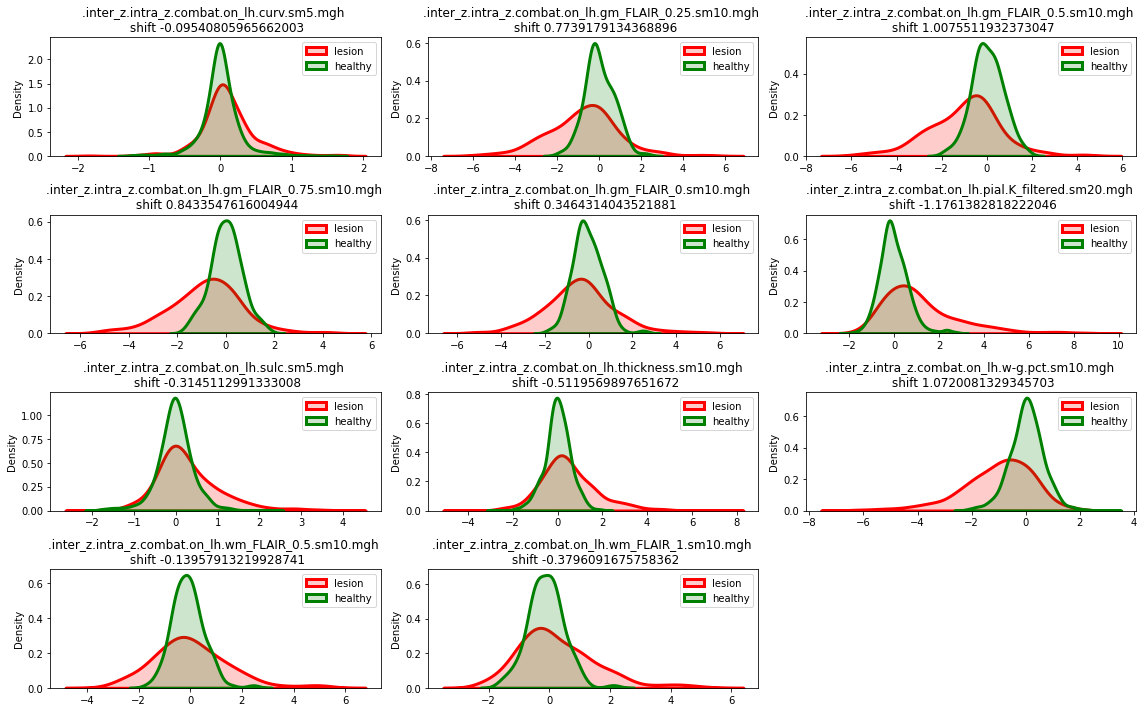

In [53]:

features_sub = [
'.inter_z.intra_z.combat.on_lh.curv.sm5.mgh',
'.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.25.sm10.mgh',
'.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.5.sm10.mgh',
'.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.75.sm10.mgh',
'.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.sm10.mgh',
'.inter_z.intra_z.combat.on_lh.pial.K_filtered.sm20.mgh',
'.inter_z.intra_z.combat.on_lh.sulc.sm5.mgh',
'.inter_z.intra_z.combat.on_lh.thickness.sm10.mgh',
'.inter_z.intra_z.combat.on_lh.w-g.pct.sm10.mgh',
'.inter_z.intra_z.combat.on_lh.wm_FLAIR_0.5.sm10.mgh',
'.inter_z.intra_z.combat.on_lh.wm_FLAIR_1.sm10.mgh',
   
]


#plot features distribution
fig = plt.figure(figsize=(16,10))
gs1 = gridspec.GridSpec(4,3)
axs = []
             
for i,feature in enumerate(features_sub):
   print(feature)
   dfsub= df.dropna(subset=[feature])
   feat_lesion = np.array(dfsub[dfsub.status=='ipsi'][feature])
   feat_control = np.array(dfsub[dfsub.status == 'control'][feature])

   mean_lesion = np.mean(feat_lesion)
   mean_healthy= np.mean(feat_control)
   shift = mean_healthy-mean_lesion
   
   
   axs.append(fig.add_subplot(gs1[i]))
   sns.kdeplot(feat_lesion, linewidth=3, fill=True, alpha=0.2, 
                        label = 'lesion', color='r', ax=axs[i])
   sns.kdeplot(feat_control, linewidth=3, fill=True, alpha=0.2, 
                        label = 'healthy', color='g', ax=axs[i])
   axs[i].set_title(f'{feature} \n shift {shift}')
   axs[i].legend()

plt.tight_layout() 


In [47]:
feat_lesion

0   -0.928278
0    0.091475
0   -0.582689
0    0.266033
0    0.376617
       ...   
0    0.113530
0   -0.111886
0    0.003913
0    0.095037
0   -0.350940
Name: .inter_z.intra_z.combat.on_lh.curv.sm5.mgh, Length: 538, dtype: float32

In [43]:
set(df)

{'.combat.on_lh.curv.sm5.mgh',
 '.combat.on_lh.gm_FLAIR_0.25.sm10.mgh',
 '.combat.on_lh.gm_FLAIR_0.5.sm10.mgh',
 '.combat.on_lh.gm_FLAIR_0.75.sm10.mgh',
 '.combat.on_lh.gm_FLAIR_0.sm10.mgh',
 '.combat.on_lh.pial.K_filtered.sm20.mgh',
 '.combat.on_lh.sulc.sm5.mgh',
 '.combat.on_lh.thickness.sm10.mgh',
 '.combat.on_lh.w-g.pct.sm10.mgh',
 '.combat.on_lh.wm_FLAIR_0.5.sm10.mgh',
 '.combat.on_lh.wm_FLAIR_1.sm10.mgh',
 '.inter_z.asym.intra_z.combat.on_lh.curv.sm5.mgh',
 '.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.25.sm10.mgh',
 '.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.5.sm10.mgh',
 '.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.75.sm10.mgh',
 '.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.sm10.mgh',
 '.inter_z.asym.intra_z.combat.on_lh.pial.K_filtered.sm20.mgh',
 '.inter_z.asym.intra_z.combat.on_lh.sulc.sm5.mgh',
 '.inter_z.asym.intra_z.combat.on_lh.thickness.sm10.mgh',
 '.inter_z.asym.intra_z.combat.on_lh.w-g.pct.sm10.mgh',
 '.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_0.5.sm10.mgh'

In [44]:
np.array(df['.inter_z.intra_z.combat.on_lh.curv.sm5.mgh'])

array([-0.9282779 ,  0.28180572,  0.09147525, ..., -0.00173127,
        0.03507261, -0.35094023], dtype=float32)

In [30]:
set(df)

{'.combat.on_lh.curv.sm5.mgh',
 '.combat.on_lh.gm_FLAIR_0.25.sm10.mgh',
 '.combat.on_lh.gm_FLAIR_0.5.sm10.mgh',
 '.combat.on_lh.gm_FLAIR_0.75.sm10.mgh',
 '.combat.on_lh.gm_FLAIR_0.sm10.mgh',
 '.combat.on_lh.pial.K_filtered.sm20.mgh',
 '.combat.on_lh.sulc.sm5.mgh',
 '.combat.on_lh.thickness.sm10.mgh',
 '.combat.on_lh.w-g.pct.sm10.mgh',
 '.combat.on_lh.wm_FLAIR_0.5.sm10.mgh',
 '.combat.on_lh.wm_FLAIR_1.sm10.mgh',
 '.inter_z.asym.intra_z.combat.on_lh.curv.sm5.mgh',
 '.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.25.sm10.mgh',
 '.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.5.sm10.mgh',
 '.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.75.sm10.mgh',
 '.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.sm10.mgh',
 '.inter_z.asym.intra_z.combat.on_lh.pial.K_filtered.sm20.mgh',
 '.inter_z.asym.intra_z.combat.on_lh.sulc.sm5.mgh',
 '.inter_z.asym.intra_z.combat.on_lh.thickness.sm10.mgh',
 '.inter_z.asym.intra_z.combat.on_lh.w-g.pct.sm10.mgh',
 '.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_0.5.sm10.mgh'